- date - Date of the sale data. There are no holiday effects or store closures.
- store - Store ID
- item - Item ID
- sales - Number of items sold at a particular store on a particular date.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/train.csv.zip")
df["date"] = pd.to_datetime(df.date)
df = df.astype({"store": "category", "item": "category"})

In [4]:
df.shape

(913000, 4)

In [5]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [15]:
df.describe(include="all")

/tmp/ipykernel_14525/1985922364.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


,date,store,item,sales
count,913000,913000.0,913000.0,913000.000000
unique,1826,10.0,50.0,NaN
top,2013-01-01 00:00:00,1.0,1.0,NaN
freq,500,91300.0,18260.0,NaN
first,2013-01-01 00:00:00,NaN,NaN,NaN
last,2017-12-31 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,52.250287
std,NaN,NaN,NaN,28.801144
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,30.000000


In [16]:
pd.Series(df.date.unique()).diff().value_counts(dropna=True)

1 days    1825
dtype: int64

In [17]:
df.date.value_counts().value_counts()

500    1826
Name: date, dtype: int64

In [18]:
df["year"] = df.date.dt.year

In [29]:
df.groupby(["store"]).sales.mean().sort_values(ascending=False)

store
2     67.033165
8     64.142048
3     59.530602
10    58.709288
9     55.049025
4     54.902946
1     47.268379
5     39.770164
6     39.733516
7     36.363735
Name: sales, dtype: float64

<AxesSubplot: xlabel='store', ylabel='sales'>

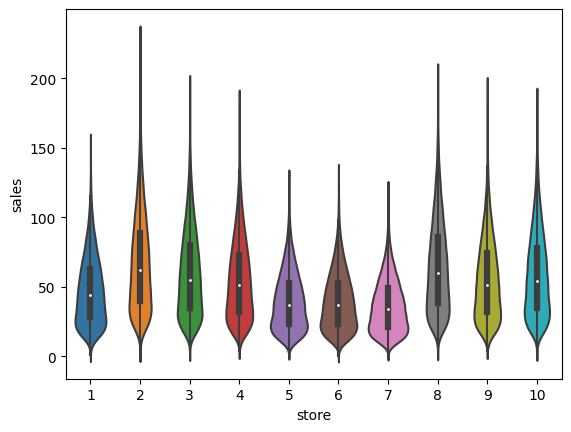

In [30]:
sns.violinplot(x="store", y="sales", data=df)

In [34]:
df.groupby(["item"]).sales.mean().sort_values(ascending=False)

item
15    88.030778
28    87.881325
13    84.316594
18    84.275794
25    80.686418
45    80.584173
38    80.521906
22    80.502245
36    77.028916
8     76.950055
10    73.227437
11    69.656353
12    69.634940
29    69.618839
33    69.560953
24    66.044633
50    65.882202
35    65.801807
14    58.681873
31    58.644304
46    58.639869
2     58.574151
7     58.531051
6     58.503888
9     51.389869
48    51.352848
43    51.294359
26    47.644085
20    47.515936
32    43.981763
39    43.883406
19    40.355531
30    40.337021
21    40.317087
42    36.688116
3     36.642223
17    32.994852
44    29.398193
49    29.335323
23    29.297864
37    29.258379
40    29.249398
34    25.735761
16    25.656079
27    22.049726
4     22.010241
47    22.003341
41    22.002136
1     21.981599
5     18.358708
Name: sales, dtype: float64

<AxesSubplot: xlabel='item', ylabel='sales'>

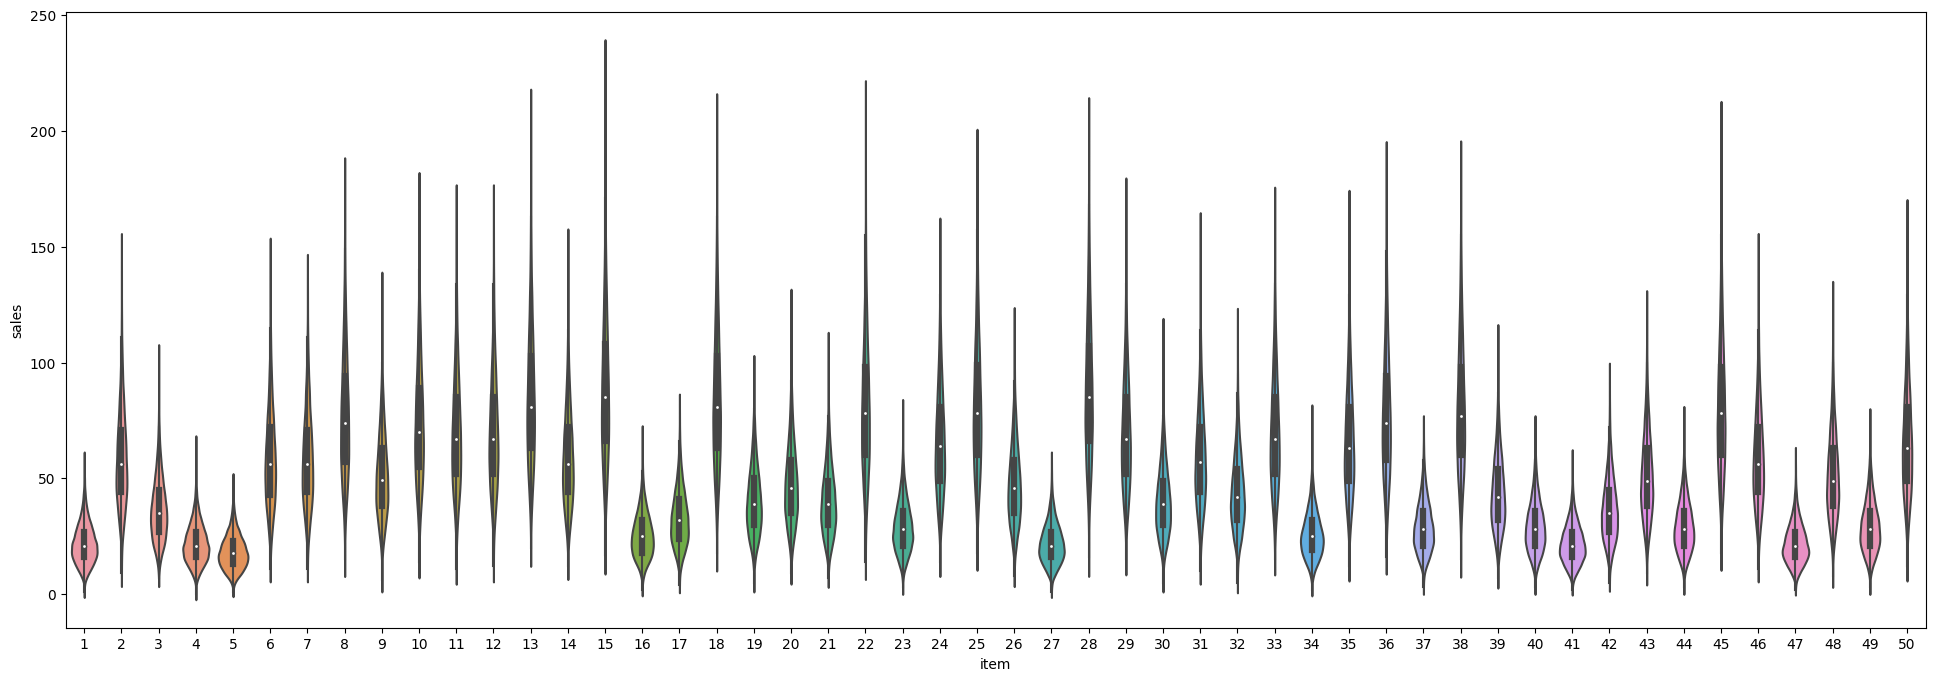

In [39]:
fig, ax = plt.subplots(figsize=(24, 8))
sns.violinplot(x="item", y="sales", data=df, ax=ax)